<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#逐步实现" data-toc-modified-id="逐步实现-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>逐步实现</a></span></li><li><span><a href="#封装类" data-toc-modified-id="封装类-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>封装类</a></span></li></ul></div>

# 逐步实现

[0, 10, 0, 5]

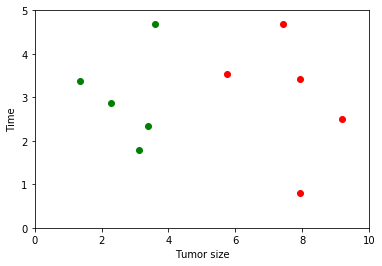

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#准备数据
# raw_data_x是特征，raw_data_y是标签，0为良性，1为恶性
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343853454, 3.368312451],
              [3.582294121, 4.679917921],
              [2.280362211, 2.866990212],
              [7.423436752, 4.685324231],
              [5.745231231, 3.532131321],
              [9.172112222, 2.511113104],
              [7.927841231, 3.421455345],
              [7.939831414, 0.791631213]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#设置训练组
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
#可视化
plt.scatter(X_train[y_train==0,0], X_train[y_train==0, 1], color="g", label="Tumor Size")
plt.scatter(X_train[y_train==1,0], X_train[y_train==1, 1], color="r", label="Time")
plt.xlabel("Tumor size")
plt.ylabel("Time")
plt.axis([0,10,0,5])

In [2]:
#使用欧氏距离求距离
from math import sqrt
distances = [] #记录预测点x到样本中每个点的距离
x = [8.90933607318, 3.365731514]
#使用循环
"""
for x_train in X_train:
    d = sqrt(np.sum((x_train-x) ** 2))
    distances.append(d)
"""
#使用列表生成器
distances = [sqrt(np.sum((x_train - x) **2)) for x_train in X_train]

#排序：使用np.argsort(array)返回排序后结果的索引
nearest = np.argsort(distances)

#选k值，记录最近k个点的标签
k = 6
topK_y = [y_train[i] for i in nearest[:k]]

#决策：投票统计数组中元素和元素出现的频次
from collections import Counter
votes = Counter(topK_y)

#Counter.most_common(n)找出票数最多的n个元素，返回列表，
#每个元素是一个元组，元组中第一个元素是对应的元素是谁，第二个元素是频次
votes.most_common(1)

predict_y = votes.most_common(1)[0][0]
predict_y

1

# 封装类

In [3]:
import numpy as np
from math import sqrt
from collections import Counter

class kNNClassifier:
    
    def __init__(self, k):
        """初始化分类器"""
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None
    
    def fit(self, X_train, y_train):
        """根据训练集数据训练KNN分类器"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_Train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k"
        self._X_train = X_train
        self._y_train = y_train
        return self
    
    def predict(self, X_predict):
        """给定带预测数据集X_predict, 返回表示X_predict结果的向量"""
        assert self._X_train is not None and self._y_train is not None, \
            "must fit before predict"
        assert X_predict.shape[1] == self._X_train.shape[1], \
            "the feature number of X_predict must be equal to X_train"
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self, x):
        distances = [sqrt(np.sum((x_train-x)**2)) for x_train in self._X_train]
        nearest = np.argsort(distances)
        topK_y = [self._y_train[i] for i in nearest]
        votes = Counter(topK_y)
        return votes.most_common(1)[0][0]
    
    def __repr__(self):
        return "kNN(k=%d)"%self.k